# **Importing Important Liabraries**

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
scaler=StandardScaler()
import matplotlib.pyplot as plt

# **Importing csv File**

In [312]:
data=pd.read_csv("/content/Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# **Analysing the DataFrame**

In [313]:
data.shape

(13320, 9)

In [314]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [315]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Data Cleaning or missing value treatment**

In [316]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bath        2.0
balcony     2.0
price      72.0
dtype: float64

In [317]:
data.fillna(data.median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [318]:
data["size"].value_counts()
data["size"].fillna("2 BHK",inplace=True) 

In [319]:
data["location"].value_counts()
data["location"].fillna("Whitefield ",inplace=True) 

In [320]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

**VISUALIZING THE DATA**

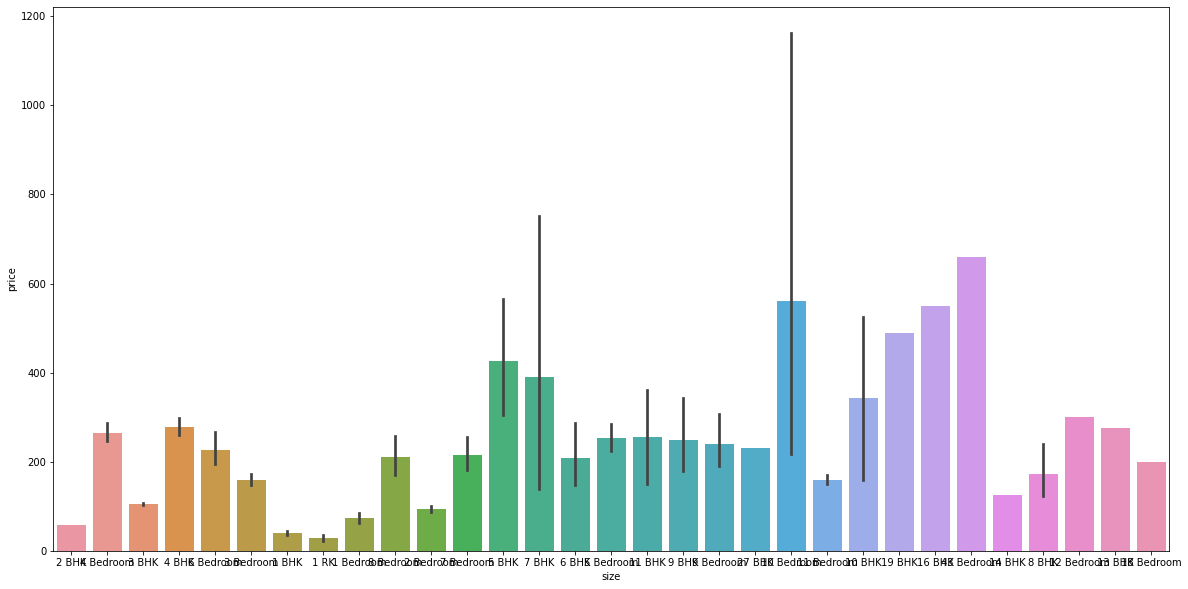

In [321]:
plt.figure(figsize=(20,10))
sns.barplot(x='size', y ='price',data = data)


In [308]:
data.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [271]:
data.columns
#for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    #loan[i]=le.fit_transform(loan[i])

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [272]:
data = data.drop(['society'],axis=1)

In [273]:
data = data.drop(['availability'],axis=1)

In [274]:
data

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [322]:
data['size']= data['size'].apply(lambda x :float(x.split(' ')[0]))
#data['location'] = data['location'].apply(lambda x : x.strip())

In [323]:
data['location'] = data['location'].apply(lambda x : x.strip())

In [277]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


data[data['total_sqft'].apply(is_float)]

**CORRELATION MATRIX**

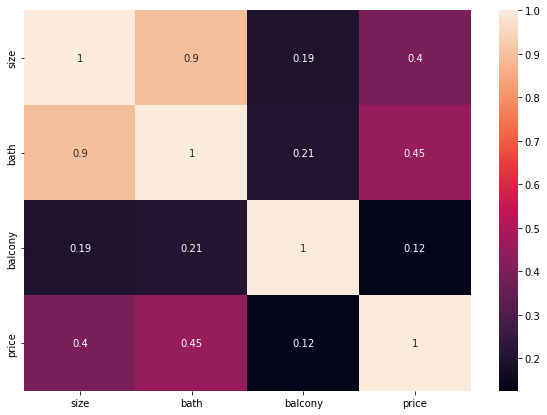

In [280]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [330]:
data.corr()['price']

size       0.398074
bath       0.454449
balcony    0.124951
price      1.000000
Name: price, dtype: float64

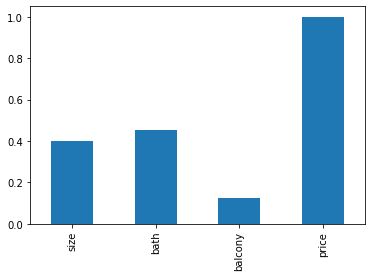

In [331]:
data.corr()['price'].plot(kind = 'bar')
plt.show()

**FINDING THE OUTLIERS**

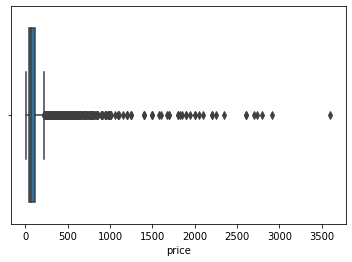

In [325]:
sns.boxplot(x=data["price"])

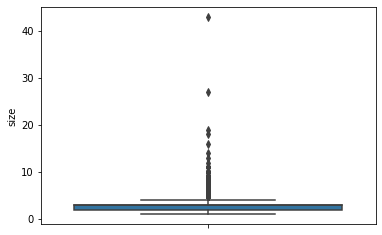

In [326]:
sns.boxplot(y=data["size"])

In [334]:

# Position of the Outlier
a=np.where(data['price']>250)
a[0]



array([    7,     9,    11, ..., 13306, 13316, 13318])

In [281]:
data['total_sqft'].values

array(['1056', '2600', '1440', ..., '1141', '4689', '550'], dtype=object)



---
**MODEL SELECTION AND MODEL TRAINING**


In [282]:
data=pd.get_dummies(data,drop_first=True )
data

,size,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1 Giri Nagar,location_1 Immadihalli,location_1 Ramamurthy Nagar,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,2.0,1.0,39.07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,3.0,120.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,3.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1.0,95.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1.0,51.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5.0,4.0,0.0,231.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,4.0,5.0,2.0,400.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,2.0,1.0,60.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,4.0,1.0,488.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:

x = data.drop(columns=['price'])
y = data['price']

In [284]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9324 entries, 6020 to 7336
Columns: 2122 entries, size to total_sqft_999
dtypes: float64(3), uint8(2119)
memory usage: 19.1 MB


**APPLYING STANDARD SCALER**

In [285]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[-0.62017048, -0.51453799, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.92489092,  1.72643617,  1.73917463, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.15236022, -0.51453799,  1.73917463, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       ...,
       [-0.62017048, -0.51453799, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.92489092,  0.97944479, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [-1.39270118, -1.26152937, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ]])

**SEPARATION OF DATA**

In [286]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
y_train

6020      62.00
3185     108.00
11847    108.00
4638      82.00
7926      75.00
          ...  
2514      67.50
11798     31.99
6637      35.07
2575     145.50
7336      70.00
Name: price, Length: 9324, dtype: float64

**LINEAR REGRESSION**

In [287]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [288]:
test_pred = lm.predict(x_test)
train_pred=lm.predict(x_train)
lm_score = lm.score(x_test,y_test)
print(lm_score*100,'%')

-1.730991420724959e+22 %


**RANDOM FOREST REGRESSION**

In [289]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)
RandomForestRegressor(n_estimators=10)
test_pred = rfr.predict(x_test)
train_pred=rfr.predict(x_train)
rfr_score = rfr.score(x_test,y_test)
print(rfr_score*100,'%')

43.00685834820638 %
